- ## Gesundheitskosten im Vergleich: Out of Pocket vs. öffentliche Ausgaben 


### Gruppe: Ana Maria Andrade, Isla Ferris , Leah Cosslett
### Fragestellungen:
- " 1. Gibt es eine inverse Beziehung zwischen öffentlichen Ausgaben und Out-of-Pocket-Ausgaben? "
- " 2. In welchen Ländern gibt es ein Gleichgewicht oder extreme Unterschiede? "   
### Datenquelle:

- https://ourworldindata.org/financing-healthcare





### 1.4 Daten beschaffen und laden

In [47]:
#  Bibliotheken laden 

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Datenset 1: Öffentliche Gesundheitsausgaben importieren
df1 = pd.read_csv("public-health-expenditure-share-gdp.csv", skiprows=1, 
                 names=["Gebiet", "Code1", "Jahr", "öffentliche Gesundheitsausgaben"])
df1.head()

,Gebiet,Code1,Jahr,öffentliche Gesundheitsausgaben
0,Albania,ALB,2010,2.442
1,Albania,ALB,2011,2.387
2,Albania,ALB,2012,2.474
3,Albania,ALB,2013,2.605
4,Albania,ALB,2014,2.617


In [4]:
# Datenset 2: Selbstgetragene Gesundheitskosten importieren
df2 = pd.read_csv("share-of-out-of-pocket-expenditure-on-healthcare.csv", skiprows=1, 
                 names=["Gebiet", "Code2", "Jahr", "Selbstgetragene Gesundheitsausgaben"])
df2.head()

,Gebiet,Code2,Jahr,Selbstgetragene Gesundheitsausgaben
0,Afghanistan,AFG,2002,85.375600
1,Afghanistan,AFG,2003,86.069190
2,Afghanistan,AFG,2004,84.527590
3,Afghanistan,AFG,2005,78.970085
4,Afghanistan,AFG,2006,76.824974


## 2. Daten vorbereiten 
- Die Daten sind schon im Long-Format
- Für die Analyse werden die beiden Datensets pivotiert. Jede Spalte repräsentiert ein Jahr und jeder Zeile einen Gebiet in alphabetische Ordnung.

In [5]:
# Vorbereitung Datenset 1: Öffentliche Gesundheitsausgaben
df1_pivot = df1.pivot(index="Gebiet", columns="Jahr", values="öffentliche Gesundheitsausgaben")
df1_pivot.head()

Jahr,1880,1890,1900,1910,1920,1930,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.474,2.605,2.617,2.755,2.842,2.762,2.878,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.144,6.264,6.361,6.853,5.619,6.644,5.965,5.954,NaN,NaN
Australia,0.00,0.00,0.00,0.38,0.57,0.44,1.913670,2.092822,2.231257,2.141681,...,5.859,5.685,6.658,6.985,6.942,6.991,7.009,7.361,7.612,NaN
Austria,0.00,0.00,0.00,0.00,0.00,0.00,2.635009,2.660758,2.703673,2.780921,...,7.617,7.612,7.673,7.678,7.657,7.686,7.724,7.865,8.772,9.555
Belgium,0.06,0.11,0.12,0.18,0.21,0.09,1.683308,1.707128,1.730949,1.850051,...,8.033,8.040,8.079,8.265,8.305,8.304,8.337,8.107,8.491,NaN


In [6]:
#Vorbereitung Datenset 2: Selbstgetragene Gesundheitsausgaben
df2_pivot = df2.pivot(index="Gebiet", columns="Jahr", values="Selbstgetragene Gesundheitsausgaben")
df2_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,85.375600,86.069190,84.527590,78.970085,76.824974,78.169980,75.403390,72.779240,...,74.486206,72.047860,73.055920,78.382290,75.974335,75.482580,76.223020,76.818370,74.813965,77.21405
Albania,51.814300,49.128300,50.855670,47.601320,47.047787,48.436172,48.580803,51.285343,56.224728,57.505250,...,58.832058,57.825634,59.115170,57.168310,57.053867,57.464123,56.489650,NaN,NaN,NaN
Algeria,25.794514,21.668524,22.524883,21.148638,26.094326,28.093613,29.121359,28.088581,26.146960,27.449507,...,25.715908,27.561977,26.658457,28.208338,30.883596,32.535194,32.628517,33.399155,35.804718,NaN
Andorra,15.397888,15.555239,15.046601,16.053387,16.933514,15.962100,17.888039,17.996744,15.578386,14.393357,...,13.563203,13.268412,12.671029,12.910532,12.377317,11.934806,12.246914,12.595785,10.925110,NaN
Angola,27.304688,45.091087,49.662052,48.510690,46.891098,42.332657,30.665700,28.383972,21.653238,15.508905,...,17.619177,21.349277,26.876167,33.523167,35.208930,34.121014,36.264200,37.887154,37.144620,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)



In [7]:
df1.dtypes


Gebiet                              object
Code1                               object
Jahr                                 int64
öffentliche Gesundheitsausgaben    float64
dtype: object

In [8]:
df2.dtypes

Gebiet                                  object
Code2                                   object
Jahr                                     int64
Selbstgetragene Gesundheitsausgaben    float64
dtype: object

### 3.1 Analyse Gebiete

In [9]:
# Anzahl Gebiete pro Datensatz
nCountries = len(df1["Gebiet"].unique())

print("Anzahl Länder öffentliche Gesundheitsausgaben: ", nCountries)

nCountries = len(df2["Gebiet"].unique())

print("Anzahl Länder Selbstgetragene Gesundheitsausgaben: ", nCountries)

Anzahl Länder öffentliche Gesundheitsausgaben:  53
Anzahl Länder Selbstgetragene Gesundheitsausgaben:  204


In [10]:
#Anzahl Datenpunkte pro Gebiet: Datenset 1 Öffentliche Gesundheitsausgaben 
df1['Gebiet'].value_counts()


Gebiet
Italy              68
Denmark            68
United Kingdom     68
Austria            68
Sweden             68
Norway             68
Canada             68
New Zealand        67
Netherlands        67
Japan              67
Greece             67
Germany            67
France             67
Finland            67
United States      67
Australia          67
Belgium            67
Switzerland        66
Ireland            63
Iceland            62
Portugal           62
Spain              61
Turkey             59
South Korea        52
Luxembourg         46
Poland             32
Czechia            31
Hungary            31
Israel             26
Slovakia           24
Estonia            23
Mexico             22
Chile              22
Lithuania          22
Costa Rica         21
Latvia             21
Colombia           21
Slovenia           21
China              20
India              20
Brazil             20
Peru               20
South Africa       20
Argentina          20
Bulgaria           18
Rom

Text(0.5, 1.0, 'Anzahl Datenpunkte pro Gebiet: öffentliche Gesundheitsausgaben')

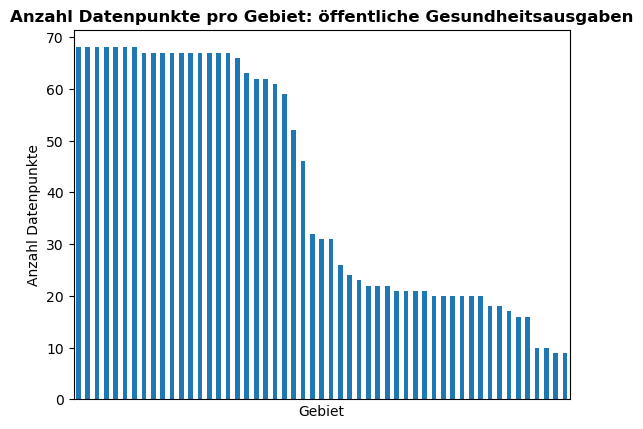

In [11]:
df1['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[ ], 
                                 ylabel= 'Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet: öffentliche Gesundheitsausgaben')
plt.title('Anzahl Datenpunkte pro Gebiet: öffentliche Gesundheitsausgaben', fontweight='bold')

In [12]:
#Anzahl Datenpunkte pro Gebiet: Datenset 2 Selbstgetragene Gesundheitskosten 
df2['Gebiet'].value_counts()

Gebiet
South Korea    22
Ireland        22
Philippines    22
Canada         22
Luxembourg     22
               ..
Syria          13
Libya          12
Zimbabwe       11
Montenegro     10
South Sudan     4
Name: count, Length: 204, dtype: int64

Text(0.5, 1.0, 'Anzahl Datenpunkte pro Gebiet: selbstgetragene Gesundheitskosten')

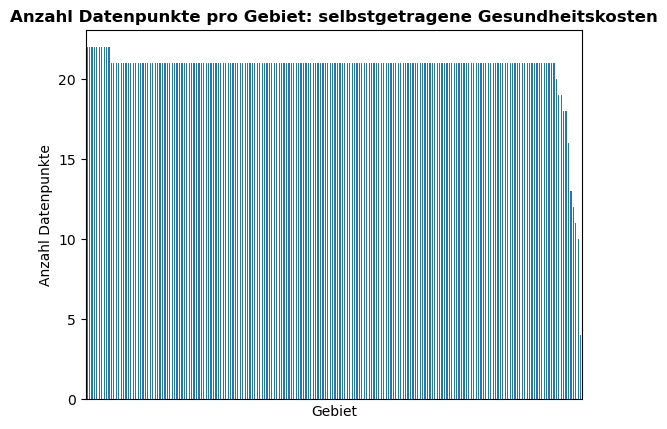

In [13]:
df2['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[ ], 
                                 ylabel= 'Anzahl Datenpunkte',title='Anzahl Datenpunkte pro Gebiet: selbstgetragene Gesundheitskosten')
plt.title('Anzahl Datenpunkte pro Gebiet: selbstgetragene Gesundheitskosten', fontweight='bold')

### 3.1.2 Analyse Codes

In [14]:
print('Anzahl verschiedener Codes öffentliche Gesundheitsausgaben: ' , len(df1['Code1'].unique()))
print('Anzahl verschiedener Codes selbstgetragene Gesundheitskosten: ' , len(df2['Code2'].unique()))

Anzahl verschiedener Codes öffentliche Gesundheitsausgaben:  53
Anzahl verschiedener Codes selbstgetragene Gesundheitskosten:  192


In [15]:
missing_data = df2[df2['Code2'].isnull()]
missing_codes = missing_data['Code2']
print("Countries with missing category codes:")
print(missing_codes)


Countries with missing category codes:
1050    NaN
1051    NaN
1052    NaN
1053    NaN
1054    NaN
       ... 
4044    NaN
4045    NaN
4046    NaN
4047    NaN
4048    NaN
Name: Code2, Length: 273, dtype: object


In [16]:
#Codes werden entfernt da nicht relevant für die Fragestellung
df1.drop("Code1", axis=1, inplace=True)
df1.head()

,Gebiet,Jahr,öffentliche Gesundheitsausgaben
0,Albania,2010,2.442
1,Albania,2011,2.387
2,Albania,2012,2.474
3,Albania,2013,2.605
4,Albania,2014,2.617


In [17]:
#Codes werden entfernt da nicht relevant für die Fragestellung
df2.drop("Code2", axis=1, inplace=True)
df2.head()

,Gebiet,Jahr,Selbstgetragene Gesundheitsausgaben
0,Afghanistan,2002,85.375600
1,Afghanistan,2003,86.069190
2,Afghanistan,2004,84.527590
3,Afghanistan,2005,78.970085
4,Afghanistan,2006,76.824974


### 3.2 Analyse Jahre

In [18]:
nYears = len(df1["Jahr"].unique())

print("Anzahl Jahren öffentliche Gesundheitsausgaben: ", nYears)

nYears = len(df2["Jahr"].unique())

print("Anzahl Jahren Selbstgetragene Gesundheitsausgaben: ", nYears)

Anzahl Jahren öffentliche Gesundheitsausgaben:  68
Anzahl Jahren Selbstgetragene Gesundheitsausgaben:  22


Text(0.5, 1.0, 'Anzahl Datenpunkte pro Jahr: öffentliche Gesundheitsausgaben')

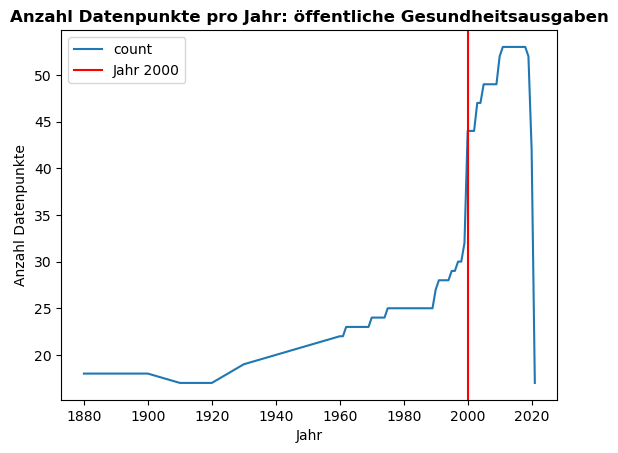

In [19]:
g = df1['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr: öffentliche Gesundheitsausgaben')
g.axvline(x=2000, color='red', label='Jahr 2000')
g.legend()
plt.title('Anzahl Datenpunkte pro Jahr: öffentliche Gesundheitsausgaben', fontweight='bold')


Text(0.5, 1.0, 'Anzahl Datenpuntkte pro Jahr: selbstgetragene Gesundheitskosten')

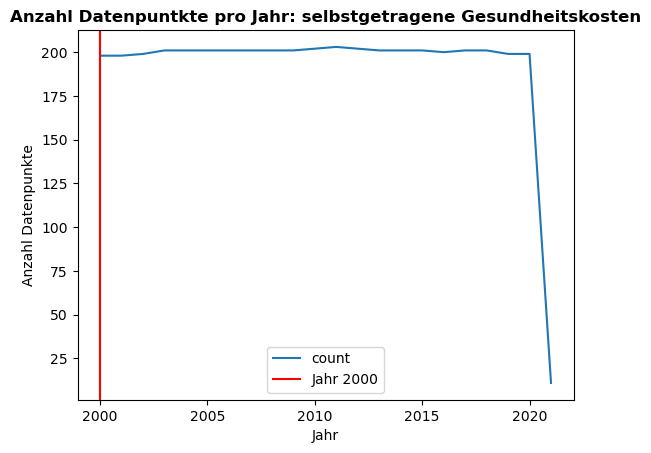

In [20]:
g = df2['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpuntkte pro Jahr: öffentliche Gesundheitsausgaben')
g.axvline(x=2000, color='red', label='Jahr 2000')
g.legend()
plt.title('Anzahl Datenpuntkte pro Jahr: selbstgetragene Gesundheitskosten', fontweight='bold')

### 3.4 Analyse Kosten

In [21]:
df1.describe()

,Jahr,öffentliche Gesundheitsausgaben
count,2177.000000,2177.000000
mean,1991.327515,4.627465
std,26.330405,2.218401
min,1880.000000,0.000000
25%,1978.000000,3.246000
50%,1999.000000,4.712000
75%,2010.000000,6.029000
max,2021.000000,15.949000


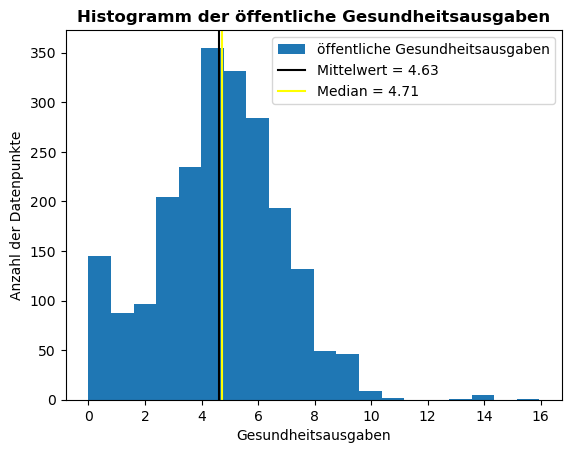

In [22]:
g = df1['öffentliche Gesundheitsausgaben'].plot(kind='hist', bins=20, title='Histogramm der öffentliche Gesundheitsausgaben', 
                                             xlabel='Gesundheitsausgaben', ylabel='Anzahl der Datenpunkte')
mean = df1['öffentliche Gesundheitsausgaben'].mean()
median = df1['öffentliche Gesundheitsausgaben'].median()
g.axvline(x=mean, color='black', label=f'Mittelwert = {mean:.2f}')
g.axvline(x=median, color='yellow', label=f'Median = {median:.2f}')
g.legend()
plt.title('Histogramm der öffentliche Gesundheitsausgaben', fontweight='bold')
plt.show()


In [23]:
column_of_interest = 'öffentliche Gesundheitsausgaben'
df1[column_of_interest] = pd.to_numeric(df1[column_of_interest], errors='coerce')
df1 = df1.dropna(subset=[column_of_interest])
top_10 = df1.nlargest(10, column_of_interest)
lowest_10 = df1.nsmallest(10, column_of_interest)
print("Top 10 Countries:")
print(top_10[['Gebiet', column_of_interest]]) 


Top 10 Countries:
             Gebiet  öffentliche Gesundheitsausgaben
2176  United States                           15.949
2172  United States                           13.912
2173  United States                           13.890
2175  United States                           13.813
2174  United States                           13.796
2171  United States                           13.664
2170  United States                           13.372
775         Germany                           11.016
774         Germany                           10.911
708          France                           10.338


In [24]:
print("\nLowest 10 Countries:")
print(lowest_10[['Gebiet', column_of_interest]]) 


Lowest 10 Countries:
        Gebiet  öffentliche Gesundheitsausgaben
29   Australia                              0.0
30   Australia                              0.0
31   Australia                              0.0
96     Austria                              0.0
97     Austria                              0.0
98     Austria                              0.0
99     Austria                              0.0
100    Austria                              0.0
101    Austria                              0.0
269     Canada                              0.0


In [25]:
df2.describe()


,Jahr,Selbstgetragene Gesundheitsausgaben
count,4223.000000,4223.000000
mean,2010.036467,33.644061
std,6.059714,19.442344
min,2000.000000,0.080350
25%,2005.000000,16.885437
50%,2010.000000,31.515785
75%,2015.000000,47.637738
max,2021.000000,86.069190


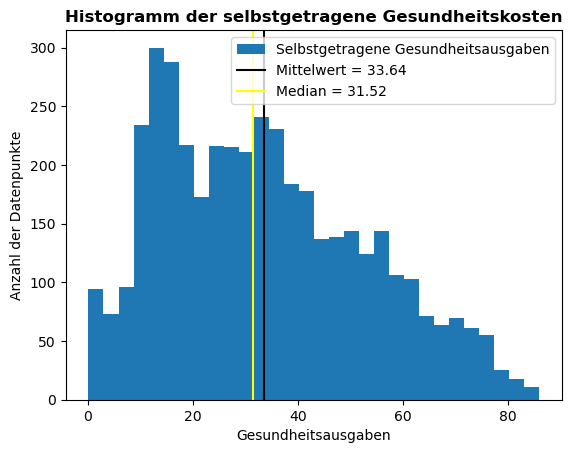

In [26]:
g = df2['Selbstgetragene Gesundheitsausgaben'].plot(kind='hist', bins=30, title='Histogramm der Selbstgetragene Gesundheitsausgaben', 
                                             xlabel='Gesundheitsausgaben', ylabel='Anzahl der Datenpunkte')
mean = df2['Selbstgetragene Gesundheitsausgaben'].mean()
median = df2['Selbstgetragene Gesundheitsausgaben'].median()
g.axvline(x=mean, color='black', label=f'Mittelwert = {mean:.2f}')
g.axvline(x=median, color='yellow', label=f'Median = {median:.2f}')
g.legend()
plt.title('Histogramm der selbstgetragene Gesundheitskosten', fontweight='bold')
plt.show()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



## Vorgehen
- Die Jahren 2000-2020 werden analysiert, damit es vergleichbar ist, da es von den selbstgetragene Gesundheitskosten nur in diesen Jahren Daten gibt 
- Die überschneidende Länder der zwei Datensätze werden isoliert und verglichen. (53 Länder)
- 
## Beobachtungen


## Interpretation

##4.1 Überschneidende Länder isolieren

In [27]:
country_col_df1 = 'Gebiet'  
country_col_df2 = 'Gebiet'  

# Überschneidende Länder ausfindig machen
common_countries = set(df1[country_col_df1]).intersection(set(df2[country_col_df2]))

df1_filtered = df1[df1[country_col_df1].isin(common_countries)]
df2_filtered = df2[df2[country_col_df2].isin(common_countries)]
print(common_countries)


{'Lithuania', 'United States', 'Spain', 'Colombia', 'Italy', 'France', 'Israel', 'Portugal', 'South Africa', 'Germany', 'Slovakia', 'Switzerland', 'Norway', 'Luxembourg', 'United Kingdom', 'Ireland', 'Cyprus', 'Latvia', 'Denmark', 'Estonia', 'Malta', 'South Korea', 'Costa Rica', 'Iceland', 'Brazil', 'Croatia', 'Mexico', 'Belgium', 'Sweden', 'Czechia', 'Finland', 'New Zealand', 'North Macedonia', 'Poland', 'Turkey', 'Albania', 'Chile', 'Australia', 'Japan', 'Hungary', 'Argentina', 'Serbia', 'Peru', 'Bulgaria', 'Netherlands', 'China', 'Romania', 'Montenegro', 'Slovenia', 'Canada', 'India', 'Greece', 'Austria'}


In [28]:
#Anzahl überschneidende Länder 
print("Number of common countries:", len(common_countries))

Number of common countries: 53


In [29]:
#Gefilterte Daten werden pivotiert für die weitere Analyse 
df1_commoncountries = df1_filtered.pivot(index="Gebiet", columns="Jahr", values="öffentliche Gesundheitsausgaben")
df2_commoncountries = df2_filtered.pivot(index="Gebiet", columns="Jahr", values="Selbstgetragene Gesundheitsausgaben")

##4.2 Berechnungen

In [30]:
#Differenz in öffentliche Ausgaben zwischen den Jahr 2020 und 2000
diffs1 = df1_commoncountries[2020] - df1_commoncountries[2000]
diffs1 = diffs1.dropna()  # Drop NaN values
print(diffs1)

Gebiet
Australia          2.415
Austria            1.820
Belgium            2.523
Canada             3.930
Chile              2.602
Colombia           2.758
Costa Rica         1.641
Czechia            2.982
Denmark            2.199
Estonia            2.007
Finland            2.281
France             2.778
Germany            3.189
Greece             1.415
Hungary            0.458
Iceland            0.739
Ireland            1.025
Israel             1.604
Italy              1.833
Japan              3.622
Latvia             1.979
Lithuania          1.040
Luxembourg         0.095
Mexico             1.290
Netherlands        4.151
New Zealand        1.957
Norway             3.451
Poland             1.050
Portugal           0.805
Slovakia           1.107
Slovenia           1.203
South Korea        3.134
Spain              2.997
Sweden             3.610
Switzerland        2.924
Turkey             0.804
United Kingdom     4.447
United States     10.406
dtype: float64


In [31]:
diffs1_sorted = diffs1.sort_values()

# Die 10 tiefsten Differenzen der öffentliche Gesundheitsausgaben
print("Tiefste 10 differenzen:")
print(diffs1_sorted.head(10))

# Die 10 höchsten Differenzen der öffentliche Gesundheitsausgaben
print("\nHöchste 10 differenzen:")
print(diffs1_sorted.tail(10))

Tiefste 10 differenzen:
Gebiet
Luxembourg    0.095
Hungary       0.458
Iceland       0.739
Turkey        0.804
Portugal      0.805
Ireland       1.025
Lithuania     1.040
Poland        1.050
Slovakia      1.107
Slovenia      1.203
dtype: float64

Höchste 10 differenzen:
Gebiet
Spain              2.997
South Korea        3.134
Germany            3.189
Norway             3.451
Sweden             3.610
Japan              3.622
Canada             3.930
Netherlands        4.151
United Kingdom     4.447
United States     10.406
dtype: float64


In [32]:
#Differenz in selbstgetragene Ausgaben zwischen den Jahr 2020 und 2000
diffs2 = df2_commoncountries[2020] - df2_commoncountries[2000]
diffs2 = diffs2.dropna()  # Drop NaN values
print(diffs2)

Gebiet
Argentina          -4.893755
Australia          -7.227429
Austria            -1.018091
Belgium            -4.185011
Brazil            -14.199730
Bulgaria           -3.791742
Canada             -4.174537
Chile             -13.437940
China             -25.334332
Colombia           -0.103562
Costa Rica        -11.288111
Croatia            -3.412431
Cyprus            -41.894231
Czechia             1.327574
Denmark            -2.526883
Estonia             1.223500
Finland            -5.217234
France              1.666841
Germany             0.253634
Greece             -2.833649
Hungary            -1.840134
Iceland            -3.000681
India             -21.109850
Ireland            -1.613529
Israel            -12.349424
Italy              -5.186887
Japan              -3.347055
Latvia            -15.569458
Lithuania           1.541531
Luxembourg         -5.798209
Malta               3.939703
Mexico            -13.456804
Netherlands        -1.711618
New Zealand        -3.785109
North M

In [33]:
diffs2_sorted = diffs2.sort_values()

# Show the lowest 10 differences
print("Lowest 10 differences:")
print(diffs2_sorted.head(10))

# Show the top 10 differences
print("\nTop 10 differences:")
print(diffs2_sorted.tail(10))

Lowest 10 differences:
Gebiet
Cyprus        -41.894231
China         -25.334332
India         -21.109850
Peru          -17.518103
South Korea   -15.888836
Latvia        -15.569458
Brazil        -14.199730
Mexico        -13.456804
Chile         -13.437940
Israel        -12.349424
dtype: float64

Top 10 differences:
Gebiet
Colombia    -0.103562
Germany      0.253634
Estonia      1.223500
Czechia      1.327574
Lithuania    1.541531
France       1.666841
Portugal     2.081443
Malta        3.939703
Serbia       6.298841
Slovakia     7.912717
dtype: float64


In [34]:
#Durchschnittliche öffentliche Gesundheitsausgaben in den 20 Jahren pro Land
df1_filtered1 = df1[(df1['Jahr'] >= 2000) & (df1['Jahr'] <= 2020) & (df1[country_col_df1].isin(common_countries))]
average_expenditure1 = df1_filtered1.groupby('Gebiet')['öffentliche Gesundheitsausgaben'].mean()
print(average_expenditure1)


Gebiet
Albania            2.640222
Argentina          5.204150
Australia          6.076571
Austria            7.468381
Belgium            7.492667
Brazil             3.624750
Bulgaria           4.085333
Canada             7.082714
Chile              4.357810
China              2.044200
Colombia           5.214762
Costa Rica         5.183667
Croatia            5.988062
Cyprus             3.062375
Czechia            5.882333
Denmark            8.183476
Estonia            4.450048
Finland            6.722524
France             8.647810
Germany            8.741095
Greece             5.289810
Hungary            4.949333
Iceland            7.008810
India              0.883400
Ireland            6.114524
Israel             4.510095
Italy              6.458238
Japan              7.604238
Latvia             3.400619
Lithuania          4.399810
Luxembourg         5.051476
Malta              5.512765
Mexico             2.678143
Montenegro         5.057000
Netherlands        7.660286
New Zealand  

In [35]:
average_expenditure1 = df1_filtered1.groupby('Gebiet')['öffentliche Gesundheitsausgaben'].mean()
averages1sorted = average_expenditure1.sort_values()

# Show the lowest 5 differences
print("Lowest 10 differences:")
print(averages1sorted.head(10))


# Show the top 5 differences
print("\nTop 10 differences:")
print(averages1sorted.tail(10))

Lowest 10 differences:
Gebiet
India           0.883400
China           2.044200
Peru            2.620400
Albania         2.640222
Mexico          2.678143
Cyprus          3.062375
Latvia          3.400619
South Korea     3.486524
Turkey          3.494143
South Africa    3.596100
Name: öffentliche Gesundheitsausgaben, dtype: float64

Top 10 differences:
Gebiet
Austria          7.468381
Belgium          7.492667
Japan            7.604238
Netherlands      7.660286
Norway           7.706333
Sweden           7.900429
Denmark          8.183476
France           8.647810
Germany          8.741095
United States    9.343571
Name: öffentliche Gesundheitsausgaben, dtype: float64


In [36]:
averagesgraph = [averages1sorted.head(5), averages1sorted.tail(5)]
print (averagesgraph)

[Gebiet
India      0.883400
China      2.044200
Peru       2.620400
Albania    2.640222
Mexico     2.678143
Name: öffentliche Gesundheitsausgaben, dtype: float64, Gebiet
Sweden           7.900429
Denmark          8.183476
France           8.647810
Germany          8.741095
United States    9.343571
Name: öffentliche Gesundheitsausgaben, dtype: float64]


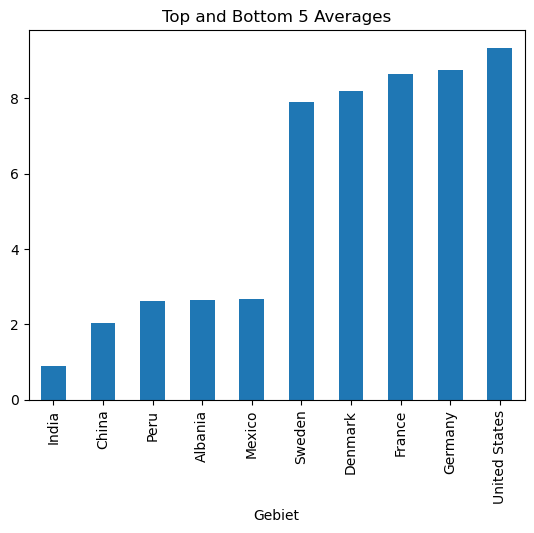

In [37]:
top_and_bottom = pd.concat(averagesgraph)
top_and_bottom.plot(kind="bar", title="Top and Bottom 5 Averages")
plt.show()

In [38]:
color_dict = {
    '': 'blue',
    'Mexico': 'cyan',
    'Cuba': 'lightgreen',
    'Oman': 'green',
    'Tanzania': 'red',
    'Sierra Leone': 'orange',
    'Malawi': 'yellow',
    'Zimbabwe': 'brown',
    'Lesotho': 'pink',
    'Eswatini': 'purple'
}

for averagesgraph in averagesgraph:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Lebenserwartungen', xlabel='Jahr', ylabel=f'Lebenserwartung', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[1980,2025], ylim=[0,80],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

NameError: name 'diffs' is not defined

In [44]:
#Durchschnittliche selbstgetragene Gesundheitskosten in den 20 Jahren pro Land
df2_filtered2 = df2[(df2['Jahr'] >= 2000) & (df2['Jahr'] <= 2020) & (df2[country_col_df2].isin(common_countries))]
average_expenditure2 = df2_filtered2.groupby('Gebiet')['Selbstgetragene Gesundheitsausgaben'].mean()
print(average_expenditure2)

Gebiet
Albania            54.359706
Argentina          28.165721
Australia          18.468749
Austria            18.623310
Belgium            19.367218
Brazil             30.357096
Bulgaria           41.661896
Canada             15.190408
Chile              36.915244
China              46.204427
Colombia           15.534594
Costa Rica         26.752106
Croatia            12.989658
Cyprus             45.131143
Czechia            13.185835
Denmark            14.055072
Estonia            22.214728
Finland            18.911003
France              9.084114
Germany            13.416183
Greece             34.450027
Hungary            27.216567
Iceland            17.241487
India              65.900021
Ireland            12.636619
Israel             24.896525
Italy              22.684389
Japan              14.397475
Latvia             40.143740
Lithuania          29.839107
Luxembourg         11.431692
Malta              31.812064
Mexico             46.636492
Montenegro         38.874923
Netherl

                 öffentliche Gesundheitsausgaben  \
Gebiet                                             
Albania                                 2.640222   
Argentina                               5.204150   
Australia                               6.076571   
Austria                                 7.468381   
Belgium                                 7.492667   
Brazil                                  3.624750   
Bulgaria                                4.085333   
Canada                                  7.082714   
Chile                                   4.357810   
China                                   2.044200   
Colombia                                5.214762   
Costa Rica                              5.183667   
Croatia                                 5.988062   
Cyprus                                  3.062375   
Czechia                                 5.882333   
Denmark                                 8.183476   
Estonia                                 4.450048   
Finland     

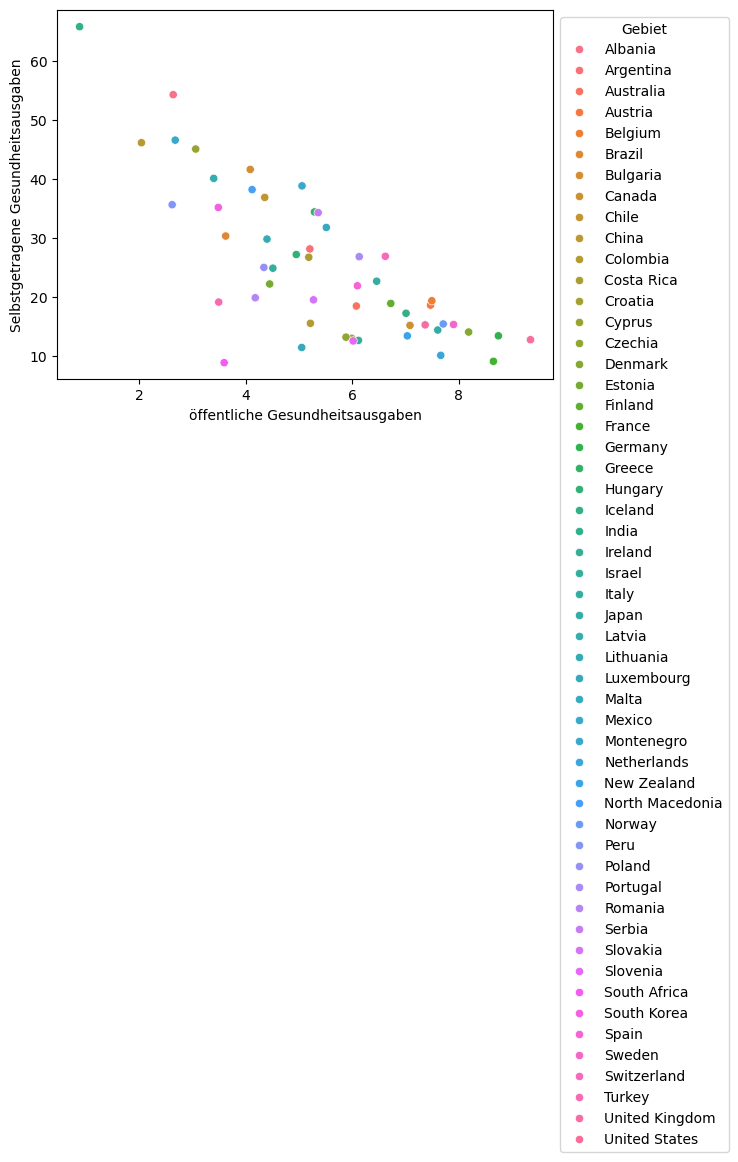

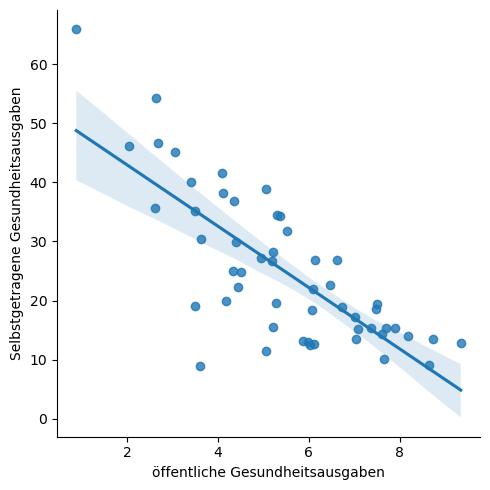

In [ ]:
#merge df1 and df2 by the country name... in one df.
average_expenditure1 = df1_filtered1.groupby('Gebiet')['öffentliche Gesundheitsausgaben'].mean()
average_expenditure2 = df2_filtered2.groupby('Gebiet')['Selbstgetragene Gesundheitsausgaben'].mean()

df3_toplot=pd.concat([average_expenditure1,average_expenditure2],axis=1)
print(df3_toplot)

#scatterplot with seaborn library.
ax=sns.scatterplot(x="öffentliche Gesundheitsausgaben", y="Selbstgetragene Gesundheitsausgaben", hue="Gebiet", data=df3_toplot)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
#regression line
ax1=sns.lmplot(x="öffentliche Gesundheitsausgaben", y="Selbstgetragene Gesundheitsausgaben", data=df3_toplot)
plt.show()